In [128]:
!git add lda.ipynb
!git commit -m "new"
!git push

[master 6fc3a5c] new
 1 file changed, 62 insertions(+), 5 deletions(-)
Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (3/3), done.
Writing objects:

In [5]:
!curl -O http://www.cs.princeton.edu/~blei/lda-c/ap.tgz
!tar xzf ap.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2857k  100 2857k    0     0  1395k      0  0:00:02  0:00:02 --:--:-- 1395k


In [7]:
# test

In [9]:
from gensim import corpora, models, matutils

In [13]:
corpus = corpora.BleiCorpus('ap/ap.dat', 'ap/vocab.txt')

In [16]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word)

In [21]:
doc = corpus.docbyoffset(0)

In [39]:
sum([y for x,y in model[doc]])

0.98824999999999985

In [29]:
len(model[doc])

7

In [31]:
v_topic = [len(model[doc]) for doc in corpus]

In [32]:
%matplotlib inline

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([  17.,   58.,   84.,  133.,  147.,  179.,  194.,  220.,  211.,
         203.,  157.,  161.,    0.,  135.,  105.,   78.,   55.,   38.,
          38.,   12.,    9.,    5.,    2.,    1.,    4.]),
 array([  1.  ,   1.92,   2.84,   3.76,   4.68,   5.6 ,   6.52,   7.44,
          8.36,   9.28,  10.2 ,  11.12,  12.04,  12.96,  13.88,  14.8 ,
         15.72,  16.64,  17.56,  18.48,  19.4 ,  20.32,  21.24,  22.16,
         23.08,  24.  ]),
 <a list of 25 Patch objects>)

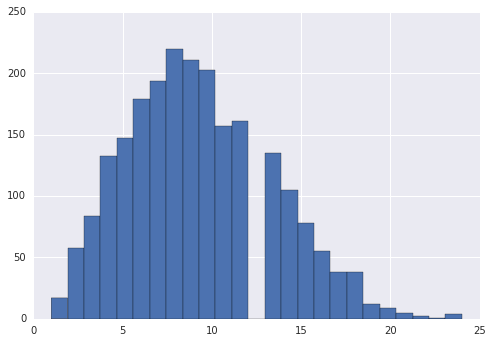

In [36]:
import seaborn
import matplotlib.pyplot as plt

plt.hist(v_topic, bins=25)

(array([  10.,   24.,   38.,   31.,   43.,   53.,  100.,  153.,  100.,
         252.,  328.,  282.,  267.,  211.,  142.,  119.,   26.,   32.,
          14.,    8.,    5.,    4.,    3.,    0.,    1.]),
 array([  1.  ,   2.88,   4.76,   6.64,   8.52,  10.4 ,  12.28,  14.16,
         16.04,  17.92,  19.8 ,  21.68,  23.56,  25.44,  27.32,  29.2 ,
         31.08,  32.96,  34.84,  36.72,  38.6 ,  40.48,  42.36,  44.24,
         46.12,  48.  ]),
 <a list of 25 Patch objects>)

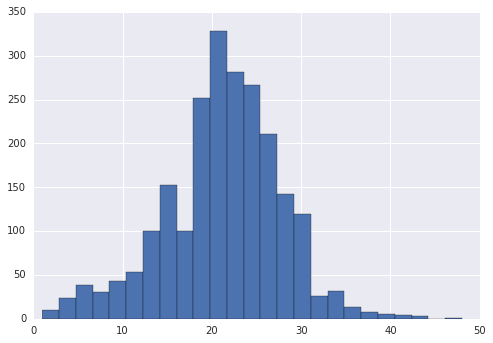

In [40]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1)
v_topic = [len(model[doc]) for doc in corpus]
plt.hist(v_topic, bins=25)

(array([  18.,   72.,   92.,  107.,  124.,  196.,  168.,  187.,  187.,
         182.,  186.,  170.,  143.,  114.,   91.,   65.,   54.,   33.,
          21.,   16.,    8.,    4.,    5.,    1.,    2.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.]),
 <a list of 25 Patch objects>)

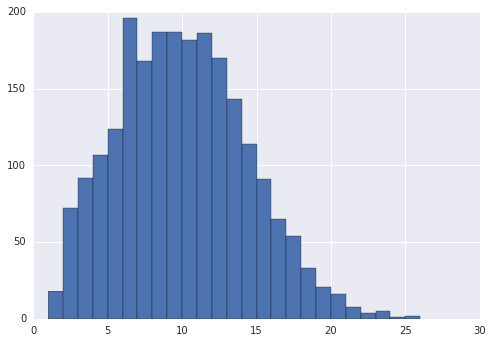

In [45]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=0.0001)
v_topic = [len(model[doc]) for doc in corpus]
plt.hist(v_topic, bins=25)

In [52]:
import gensim
gensim.__version__

'0.12.3'

In [54]:
model.show_topic(0, 5)

[(u'poll', 0.016212092766029872),
 (u'bushs', 0.01507164988365318),
 (u'support', 0.012401520079177332),
 (u'bush', 0.012339867652239508),
 (u'dukakis', 0.011003284767076632)]

In [51]:
for t in range(model.num_topics):
    words = model.show_topic(t, 64)
    tf = sum(w for f, w in words)
    for w, f in words:
        print w, f / tf
    print '--------------------'

poll 0.0593016592253
bushs 0.0551300722407
support 0.0453630958214
bush 0.0451375795192
dukakis 0.0402485387318
new 0.0357297598879
voters 0.031688670665
states 0.0279422692502
president 0.0236528767362
contracts 0.0221769460261
massachusetts 0.0204837418625
percent 0.0203870879678
aziz 0.0202369570089
campaign 0.0193583265068
nonprofit 0.0187700365519
chicago 0.0177587589618
awards 0.0169495863516
democrats 0.0165506497251
i 0.0157631353015
political 0.0143850874503
south 0.0139226693916
economy 0.0138512560459
jackson 0.0137532068387
george 0.0132514705129
democratic 0.0132283224002
york 0.0129770081172
significant 0.0127947463051
million 0.0122325698979
united 0.0116744898474
awarded 0.011517088042
alice 0.0106880092897
apartheid 0.0105814635687
republican 0.0105520377947
amid 0.010369538112
goldman 0.0102933667214
today 0.0101862778223
vice 0.0101844406263
thursday 0.0101825507225
benefited 0.0101378502458
upbeat 0.0100067738583
group 0.00995226065809
release 0.00983931155503
domin

In [59]:
topics = matutils.corpus2dense(model[corpus], model.num_topics)

In [82]:
weight = topics.sum(axis=1)

In [83]:
max_topic = weight.argmax()

In [84]:
topics.shape

(100, 2246)

In [85]:
topics

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02329317,  0.        ,  0.0270288 , ...,  0.20557708,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01648837,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [86]:
words = model.show_topic(max_topic, 64)

In [87]:
words

[(u'aids', 0.0060822702986221373),
 (u'virus', 0.0057454593000472306),
 (u'people', 0.0051536650364605568),
 (u'new', 0.0049394553729328614),
 (u'i', 0.004650131772034864),
 (u'first', 0.0045764348016935786),
 (u'million', 0.0042921311968997936),
 (u'american', 0.0040224950411366922),
 (u'bank', 0.0039420340704600671),
 (u'infected', 0.0036103651919694563),
 (u'blood', 0.0035316137097215713),
 (u'president', 0.0032760219588954054),
 (u'year', 0.0032234305537156395),
 (u'officials', 0.0030299863963780416),
 (u'two', 0.0029953656659573828),
 (u'immune', 0.0026855587471412063),
 (u'black', 0.0026515641203408461),
 (u'time', 0.0026297084497366044),
 (u'years', 0.0025820680268564514),
 (u'program', 0.002576095505574479),
 (u'center', 0.0025669436786226059),
 (u'america', 0.0024972788480061318),
 (u'four', 0.0024769838868617276),
 (u'just', 0.0024513421831889835),
 (u'national', 0.0023140293369879211),
 (u'state', 0.0022463866294010868),
 (u'disease', 0.0021708923245371109),
 (u'last', 0.002

In [89]:
import wordcloud

In [91]:
wc =  wordcloud.WordCloud(width=800, height=400, margin=5)

In [93]:
[(y, x) for x, y in words]

[(0.0060822702986221373, u'aids'),
 (0.0057454593000472306, u'virus'),
 (0.0051536650364605568, u'people'),
 (0.0049394553729328614, u'new'),
 (0.004650131772034864, u'i'),
 (0.0045764348016935786, u'first'),
 (0.0042921311968997936, u'million'),
 (0.0040224950411366922, u'american'),
 (0.0039420340704600671, u'bank'),
 (0.0036103651919694563, u'infected'),
 (0.0035316137097215713, u'blood'),
 (0.0032760219588954054, u'president'),
 (0.0032234305537156395, u'year'),
 (0.0030299863963780416, u'officials'),
 (0.0029953656659573828, u'two'),
 (0.0026855587471412063, u'immune'),
 (0.0026515641203408461, u'black'),
 (0.0026297084497366044, u'time'),
 (0.0025820680268564514, u'years'),
 (0.002576095505574479, u'program'),
 (0.0025669436786226059, u'center'),
 (0.0024972788480061318, u'america'),
 (0.0024769838868617276, u'four'),
 (0.0024513421831889835, u'just'),
 (0.0023140293369879211, u'national'),
 (0.0022463866294010868, u'state'),
 (0.0021708923245371109, u'disease'),
 (0.002169917421

In [92]:
wc.generate_from_frequencies(words)

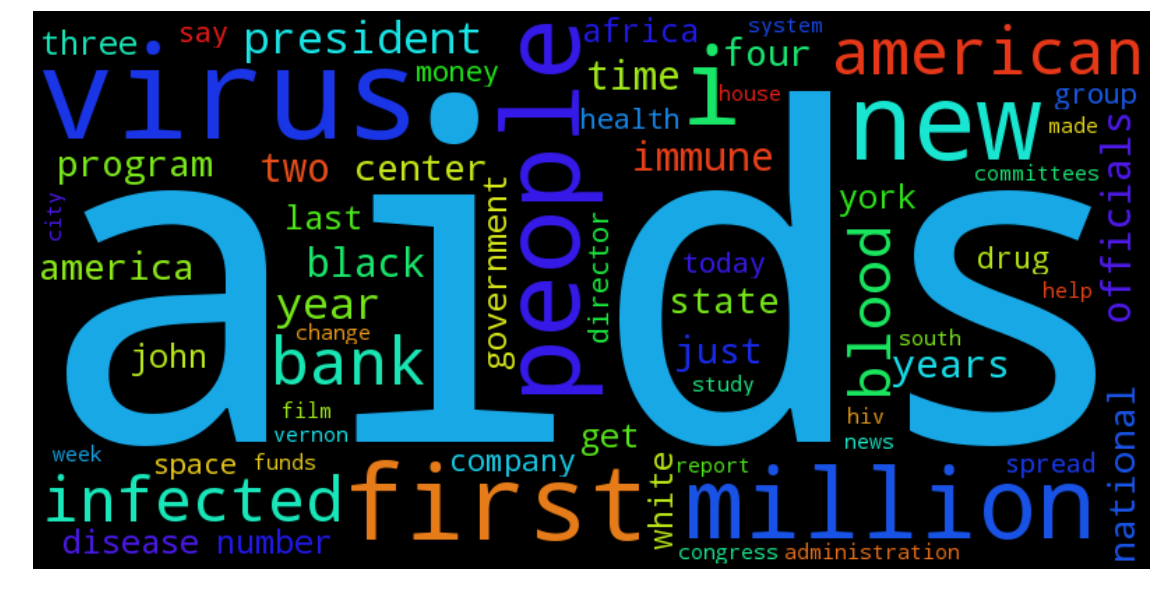

In [95]:
plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [120]:
from scipy.spatial import distance
import numpy

In [121]:
pair = distance.squareform(distance.pdist(numpy.matrix.transpose(topics)))

In [122]:
pair.shape

(2246, 2246)

In [124]:
def close_topic(doc_id):
    return pair[doc_id].argmin()

In [125]:
large = pair.max()

In [126]:
for t in xrange(pair.shape[0]):
    pair[t,t] = large + 1

In [127]:
close_topic(0)

109

In [129]:
f = open('ap/ap.txt', 'r').read()

In [133]:
print f.split('</DOC>')[0]

<DOC>
<DOCNO> AP881218-0003 </DOCNO>
<TEXT>
 A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Friends and family said

In [134]:
print f.split('</DOC>')[109]


<DOC>
<DOCNO> AP901030-0150 </DOCNO>
<TEXT>
 A woman who locked her 5-year-old daughter in a car while she worked part-time went to court Tuesday to regain custody of the girl from the county, but court officials said the judge didn't rule. Police and court officials said the case was continued. They spoke on condition of anonymity because Family Court rules require that cases be kept confidential. The mother, Chante Fernandez, canceled a news conference she had planned after the hearing and refused to speak to reporters as she dashed from the Union County Courthouse to a limousine. Her attorney and police officers shielded Ms. Fernandez from the nearly reporters who waited in the courthouse garage. Ms. Fernandez' daughter, Anjuli, is under the care of the New Jersey Division of Youth and Family Services pending resolution of the case. The girl wasn't present at the hearing, a welfare official said. Ms. Fernandez, 24, of Elizabeth, was jailed after police found her pajama-clad daughte